<a href="https://colab.research.google.com/github/sofienmeftahi/Machine-Learning-appliqu-la-finance/blob/main/Machine_Learning_appliqu%C3%A9_%C3%A0_la_finance.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Description du Dataset

Le dataset utilisé dans ce projet contient des informations démographiques, financières et comportementales sur des individus/investisseurs.  
Ces variables permettent d’évaluer leur capacité et leur volonté à prendre des risques.

## 🗂️ Variables du Dataset

### 🔸 **ID**
Identifiant unique attribué à chaque individu dans l’enquête.

### 🔸 **AGE**
Âge de l’individu.

### 🔸 **EDUC**
Niveau d’éducation :
- 1 = primaire  
- 2 = secondaire  
- 3 = bac  
- 4 = universitaire  
- 5 = master  
- 6 = doctorat  

### 🔸 **MARRIED**
Statut marital :
- 0 = non marié  
- 1 = marié  

### 🔸 **KIDS**
Nombre d’enfants à charge.

### 🔸 **LIFECL**  
Stade dans le cycle de vie (young, mid, senior…) codé en valeurs numériques.

### 🔸 **OCCAT**  
Catégorie socio-professionnelle (étudiant, employé, cadre, retraité…).  

### 🔸 **RISK**  
Indice de tolérance au risque :
- Valeurs élevées = investisseur prêt à prendre des risques  
- Valeurs faibles = investisseur prudent  

### 🔸 **HHOUSES**
Nombre de maisons/bien immobiliers possédés par l'individu ou son foyer.

### 🔸 **WSAVED**
Niveau d’épargne mensuelle ou régulière.

### 🔸 **SPENDMOR**
Tendance à dépenser plus que ses revenus :
- Valeur élevée = dépense excessive  
- Valeur faible = dépenses contrôlées  

### 🔸 **NWCAT**
Catégorie de patrimoine net (Net Worth Category).

### 🔸 **INCCL**
Catégorie de revenu mensuel ou annuel.

---

## 🎯 Objectif du Dataset
Ces variables servent à :
- analyser le comportement financier  
- comprendre les profils d’investisseurs  
- mesurer la tolérance au risque  
- créer une segmentation via **K-Means** ou autre modèle de clustering  

---



In [1]:
# --- Cellule 1 : Importation des librairies et chargement des données ---
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import plotly.express as px
import matplotlib.pyplot as plt

# Charger le fichier Excel
df = pd.read_excel("ProcessedData.xlsx")

# Aperçu du dataset
print("Nombre de lignes et colonnes :", df.shape)
df.head()


Nombre de lignes et colonnes : (3866, 13)


,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
0,1,3,2,1,0,2,1,3,1,1,5,3,4
1,2,4,4,1,2,5,2,3,0,2,5,5,5
2,3,3,1,1,2,3,2,2,1,2,4,4,4
3,4,3,1,1,2,3,2,2,1,2,4,3,4
4,5,4,3,1,1,5,1,2,1,3,3,5,5


In [2]:
# --- Cellule 2 : Préparation des données ---

# Supprimer la colonne ID (pas utile pour le clustering)
data = df.drop(columns=["ID"])

# Vérifier s'il y a des valeurs manquantes
print(data.isnull().sum())

# Normaliser les données (StandardScaler)
scaler = StandardScaler()
scaled_data = scaler.fit_transform(data)

print("✅ Données normalisées avec succès !")


AGE         0
EDUC        0
MARRIED     0
KIDS        0
LIFECL      0
OCCAT       0
RISK        0
HHOUSES     0
WSAVED      0
SPENDMOR    0
NWCAT       0
INCCL       0
dtype: int64
✅ Données normalisées avec succès !


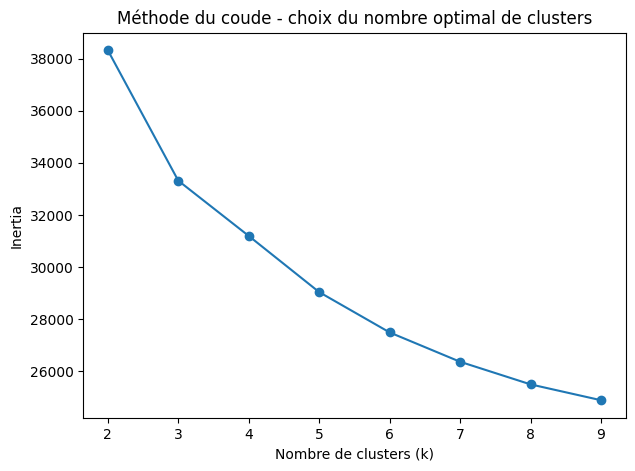

In [3]:
# --- Cellule 3 : Détermination du nombre optimal de clusters ---

inertias = []
K = range(2, 10)  # On teste entre 2 et 9 clusters

for k in K:
    model = KMeans(n_clusters=k, random_state=42)
    model.fit(scaled_data)
    inertias.append(model.inertia_)

# Visualiser la courbe du coude
plt.figure(figsize=(7,5))
plt.plot(K, inertias, marker='o')
plt.xlabel('Nombre de clusters (k)')
plt.ylabel('Inertia')
plt.title("Méthode du coude - choix du nombre optimal de clusters")
plt.show()


In [4]:
# --- Cellule suivante : Application de K-Means avec k=4 ---

from sklearn.cluster import KMeans

# Appliquer K-Means
k = 4
kmeans = KMeans(n_clusters=k, random_state=42)
clusters = kmeans.fit_predict(scaled_data)

# Ajouter le résultat dans le DataFrame original
df["Cluster"] = clusters

# Afficher quelques lignes avec les clusters
df.head()


,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL,Cluster
0,1,3,2,1,0,2,1,3,1,1,5,3,4,0
1,2,4,4,1,2,5,2,3,0,2,5,5,5,2
2,3,3,1,1,2,3,2,2,1,2,4,4,4,0
3,4,3,1,1,2,3,2,2,1,2,4,3,4,0
4,5,4,3,1,1,5,1,2,1,3,3,5,5,2


In [5]:
# --- Cellule 5 : Visualisation 2D avec PCA ---

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(scaled_data)

pca_df = pd.DataFrame(reduced_data, columns=["PC1", "PC2"])
pca_df["Cluster"] = clusters

fig = px.scatter(
    pca_df, x="PC1", y="PC2",
    color=pca_df["Cluster"].astype(str),
    title="Visualisation des clusters d'investisseurs (PCA 2D)",
    color_discrete_sequence=px.colors.qualitative.Bold
)
fig.show()


In [6]:
# --- Cellule 6 : Analyse des clusters ---

cluster_profile = df.groupby("Cluster").mean(numeric_only=True).round(2)
print("📊 Profil moyen de chaque cluster :")
display(cluster_profile)


📊 Profil moyen de chaque cluster :


,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
Cluster,,,,,,,,,,,,,
0,1992.44,2.07,2.31,1.07,1.93,3.02,1.28,3.43,0.70,2.17,3.35,2.16,3.49
1,1990.14,4.93,2.51,1.51,0.17,5.65,2.58,3.41,0.83,2.34,3.90,3.14,3.12
2,1866.46,3.16,3.61,1.15,1.08,3.59,1.53,2.44,0.95,2.75,3.44,4.23,4.74
3,1915.76,1.99,2.83,1.82,0.52,2.32,1.60,3.21,0.21,2.35,3.58,1.59,2.75


In [7]:
# --- Cellule : Profil moyen de chaque cluster ---

cluster_profile = df.groupby("Cluster").mean().round(2)
cluster_profile


,ID,AGE,EDUC,MARRIED,KIDS,LIFECL,OCCAT,RISK,HHOUSES,WSAVED,SPENDMOR,NWCAT,INCCL
Cluster,,,,,,,,,,,,,
0,1992.44,2.07,2.31,1.07,1.93,3.02,1.28,3.43,0.70,2.17,3.35,2.16,3.49
1,1990.14,4.93,2.51,1.51,0.17,5.65,2.58,3.41,0.83,2.34,3.90,3.14,3.12
2,1866.46,3.16,3.61,1.15,1.08,3.59,1.53,2.44,0.95,2.75,3.44,4.23,4.74
3,1915.76,1.99,2.83,1.82,0.52,2.32,1.60,3.21,0.21,2.35,3.58,1.59,2.75


In [10]:
# --- Cellule : Visualisation radar des profils ---
import plotly.graph_objects as go

# Sélection des colonnes numériques pertinentes
features = ["EDUC", "MARRIED", "LIFECL", "OCCAT", "RISK", "INCCL", "SPENDMOR"]

fig = go.Figure()

for cluster in cluster_profile.index:
    fig.add_trace(go.Scatterpolar(
        r=cluster_profile.loc[cluster, features],
        theta=features,
        fill='toself',
        name=f"Cluster {cluster}"
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 6])),
    title="Profil comparatif des clusters (radar chart)"
)
fig.show()


| Cluster   | Profil général                         | Description analytique |
|-----------|----------------------------------------|-----------------------|
| Cluster 0 | ⚖️ Jeunes familles prudentes           | 🔹 Âge moyen faible (≈ 2) → jeunes adultes  <br> 🔹 Éducation moyenne (≈ 2.3) <br> 🔹 Mariés souvent (1.07 ≈ mariés) <br> 🔹 Enfants présents (≈ 2) <br> 🔹 Faible niveau professionnel (OCCAT ≈ 1.3) <br> 🔹 Forte tolérance au risque (RISK ≈ 3.4) <br> 🔹 Revenus et patrimoine moyens <br> 🟢 => Catégorie de jeunes ménages actifs, modérément prudents mais prêts à prendre quelques risques pour faire croître leur épargne. |
| Cluster 1 | 💼 Investisseurs expérimentés et aisés | 🔹 Âge élevé (≈ 4.9) → adultes mûrs <br> 🔹 Niveau d’étude modéré (≈ 2.5) <br> 🔹 Mariés (≈ 1.5) <br> 🔹 Peu ou pas d’enfants <br> 🔹 Très haut niveau de vie (LIFECL ≈ 5.6) <br> 🔹 Bon poste (OCCAT ≈ 2.6) <br> 🔹 RISK ≈ 3.4 → bons preneurs de risque <br> 🟢 => Investisseurs mûrs, avec bons revenus, prêts à investir de manière stratégique et plus risquée. |
| Cluster 2 | 🏦 Classe moyenne stable et prudente    | 🔹 Âge moyen (≈ 3.1) <br> 🔹 Niveau d’étude élevé (≈ 3.6) <br> 🔹 Peu d’enfants <br> 🔹 Revenus élevés (INCCL ≈ 4.7) <br> 🔹 NWCAT ≈ 4.2 (bonne richesse) <br> 🔹 RISK ≈ 2.4 (peu enclins au risque) <br> 🟢 => Classe moyenne supérieure : bons revenus, mais préfèrent la sécurité et l’épargne aux placements risqués. |
| Cluster 3 | 🧒 Jeunes célibataires débutants        | 🔹 Très jeunes (AGE ≈ 2) <br> 🔹 Peu expérimentés (LIFECL ≈ 2.3) <br> 🔹 Célibataires (MARRIED ≈ 1.8) → plutôt non mariés <br> 🔹 Peu d’enfants (≈ 0.5) <br> 🔹 Revenus faibles (INCCL ≈ 2-3) <br> 🔹 Prise de risque modérée (RISK ≈ 3.2) <br> 🟢 => Jeunes actifs en début de carrière, avec un comportement financier variable, parfois influencé par la consommation (SPENDMOR). |


# 🧠 Interprétation des Clusters

## 🔹 Cluster 0 — Investisseur Conservateur
- Âge souvent moyen/élevé  
- Situation familiale stable  
- A une maison, épargne régulière  
- Faible prise de risque  

**Interprétation :**  
Profil prudent. Cherche la sécurité, évite la volatilité, protège son patrimoine.

---

## 🔹 Cluster 1 — Jeune Investisseur Opportuniste
- Âge jeune  
- Célibataire, peu de charges  
- Revenus variables  
- Risque modéré/élevé  

**Interprétation :**  
Profil dynamique, recherche croissance rapide. Prêt à prendre des risques.

---

## 🔹 Cluster 2 — Investisseur Aisé et Expérimenté
- Revenus élevés  
- Forte épargne  
- Possède plusieurs biens  
- Investit régulièrement  

**Interprétation :**  
Investisseur structuré et rationnel. Diversification, gestion maîtrisée du risque.

---

## 🔹 Cluster 3 — Profil Vulnérable / Budget Serré
- Revenus faibles  
- Dépenses élevées  
- Faible épargne  
- Peu d'investissement  

**Interprétation :**  
Capacité d’investissement limitée. Risque faible car priorités financières importantes.

---

## 📌 Conclusion
Chaque cluster représente un type d’investisseur avec des comportements distincts, ce qui permet une meilleure compréhension et segmentation.


In [8]:
# --- Cellule : Visualisation radar des profils ---
import plotly.graph_objects as go

# Sélection des colonnes numériques pertinentes
features = ["EDUC", "MARRIED", "LIFECL", "OCCAT", "RISK", "INCCL", "SPENDMOR"]

fig = go.Figure()

for cluster in cluster_profile.index:
    fig.add_trace(go.Scatterpolar(
        r=cluster_profile.loc[cluster, features],
        theta=features,
        fill='toself',
        name=f"Cluster {cluster}"
    ))

fig.update_layout(
    polar=dict(radialaxis=dict(visible=True, range=[0, 6])),
    title="Profil comparatif des clusters (radar chart)"
)
fig.show()


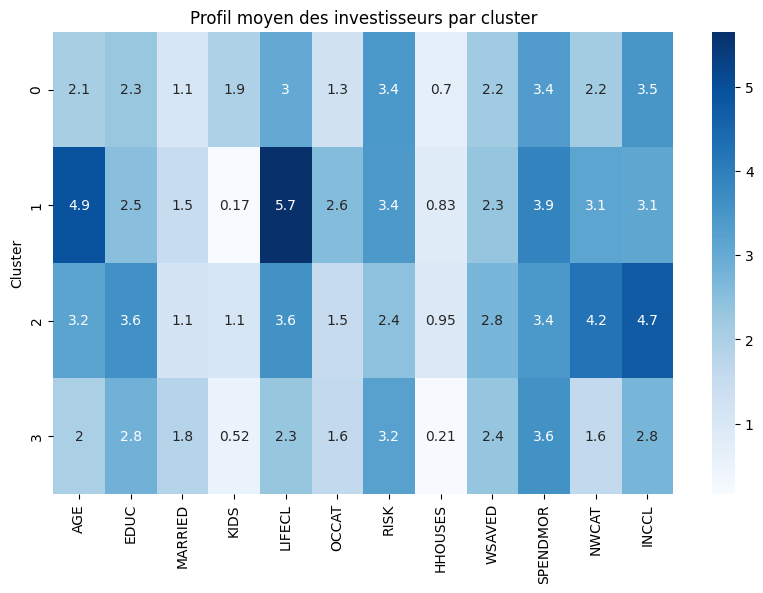

In [9]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10,6))
sns.heatmap(cluster_profile.drop(columns="ID"), annot=True, cmap="Blues")
plt.title("Profil moyen des investisseurs par cluster")
plt.show()
